<a href="https://colab.research.google.com/github/BurgundyIsAPublicEnemy/ORLIAn-Source-Code/blob/main/orlian_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
The goal is to validate and make sense of the information in [the project description](https://medium.com/epidemium/notice-challenge-1-ent-data-description-3570ef4b63c7)

While also exploring early features to exploit 

# Set Up Imports and Files Loading

In [1]:
IMAGEFILES = '/content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2'
TABULARTRAINING = '/content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/avatarsV2_train.csv'
TABULARTEST = '/content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/avatarsV2_test_X.csv'

In [53]:
# IMPORTS 
from PIL import Image
from numpy import asarray
from sklearn.model_selection import train_test_split
from keras.applications.resnet import ResNet50, preprocess_input
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import cv2, os
import collections
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Check if files are fine 
count = 0
import os
for dirname, _, filenames in os.walk(IMAGEFILES + ''):
    for filename in filenames:
        count = count + 1
print(count , " files detected")

0  files detected


In [6]:
train_df = pd.read_csv(TABULARTRAINING)
train_df.head()

,id,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,N,M,Tabac,Alcool,Data,OS
0,abf1b4,1,1,1954-06-17,2013-08-10,59,0,0,Oropharynx,2,4,2b,0,3,1,Image + clinical,84
1,a5969b,1,1,1937-02-09,2014-09-06,77,1,0,Oropharynx,1,4,2c,1,2,1,Image + clinical,24
2,aa21da,1,1,1968-04-09,2013-03-12,44,0,0,Oropharynx,2,3,3,0,3,1,Image + clinical,47
3,b075a7,1,1,1947-02-10,2014-11-08,67,1,0,Oropharynx,1,2,2c,0,2,1,Image + clinical,9
4,b2e232,1,1,1942-08-03,2014-04-23,71,0,1,Oropharynx,1,4,2b,1,2,0,Image + clinical,37


In [39]:
train_df.describe()

,OMS,sexe (0=F 1=M),Age au diag,Deces Code,Code recidive,RNAscope,T,M,Tabac,Alcool,OS
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.750000,0.788462,63.307692,0.326923,0.250000,1.384615,3.057692,0.153846,1.826923,0.923077,50.250000
std,0.479992,0.412384,9.770982,0.473665,0.437237,0.599145,1.017753,0.364321,1.263688,0.269069,23.210778
min,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,1.000000,54.750000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,33.250000
50%,1.000000,1.000000,66.500000,0.000000,0.000000,1.000000,3.500000,0.000000,2.000000,1.000000,55.500000
75%,1.000000,1.000000,72.000000,1.000000,0.250000,2.000000,4.000000,0.000000,3.000000,1.000000,68.250000
max,2.000000,1.000000,79.000000,1.000000,1.000000,2.000000,4.000000,1.000000,3.000000,1.000000,89.000000


# EDA

## How does the data look? 
Questions: 
* Is there any bias in the number of dead patients vs alive ones?

In [51]:
# GOAL: Check balance of image data against IDs 

paths = [IMAGEFILES + "/inflamed_cell_1", IMAGEFILES + "/inflamed_cell_2", IMAGEFILES + "/inflamed_cell_4", IMAGEFILES + "/inflamed_cell_5", IMAGEFILES + "/segmentation_tissue", IMAGEFILES + "/tumour_inflamed_cells_3", IMAGEFILES + "/tumour_inflamed_cells_6"]
layerIdFrequencies = []


for path in paths:
  print('Reading: ' , path)
  list_of_files = []
  idFrequency = {}

  for root, dirs, files in os.walk(path):
        for file in files:
            list_of_files.append(os.path.join(root,file))

  for ids in train_df['id']:

    idFrequency[ids] = 0
    
    for name in list_of_files:
          img = Image.open(name)
          filename = os.path.basename(name)
          # Connect the meta data here
          if (ids == filename.split('_')[0]):
            idFrequency[ids] = idFrequency[ids] + 1

  layerIdFrequencies.append(idFrequency)



Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_1
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_2
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_4
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_5
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/segmentation_tissue
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_3
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_6


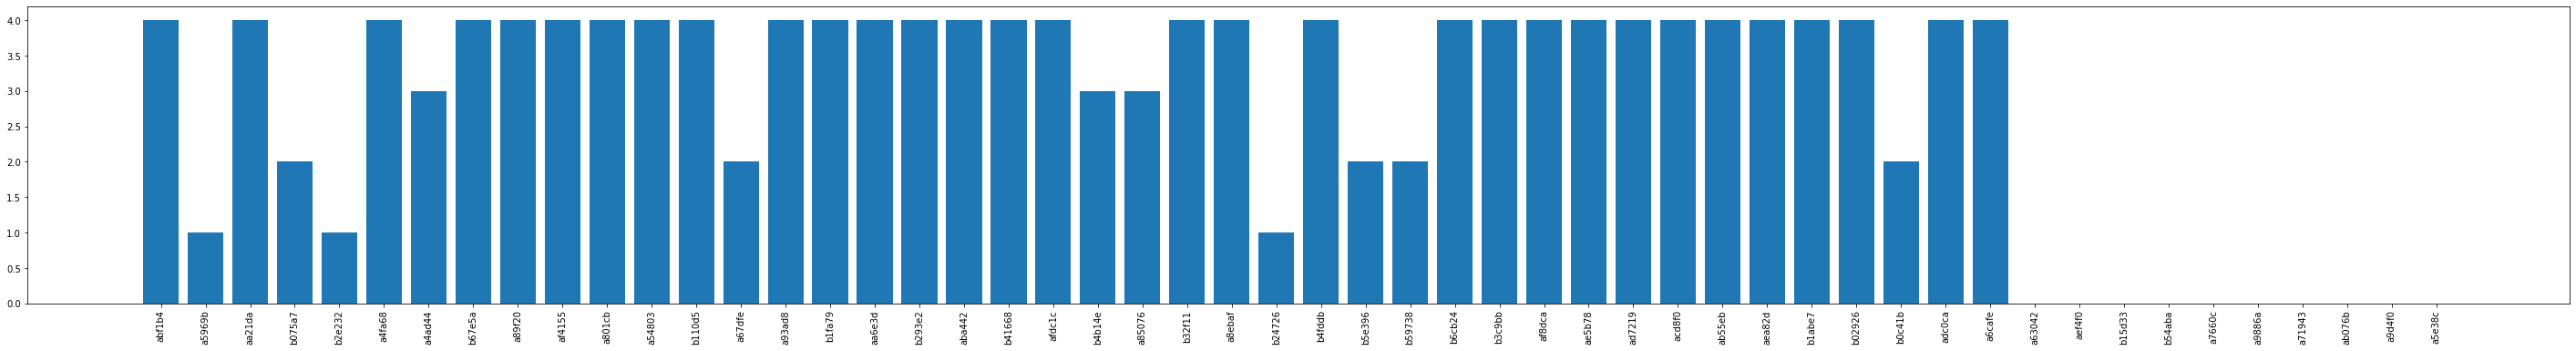

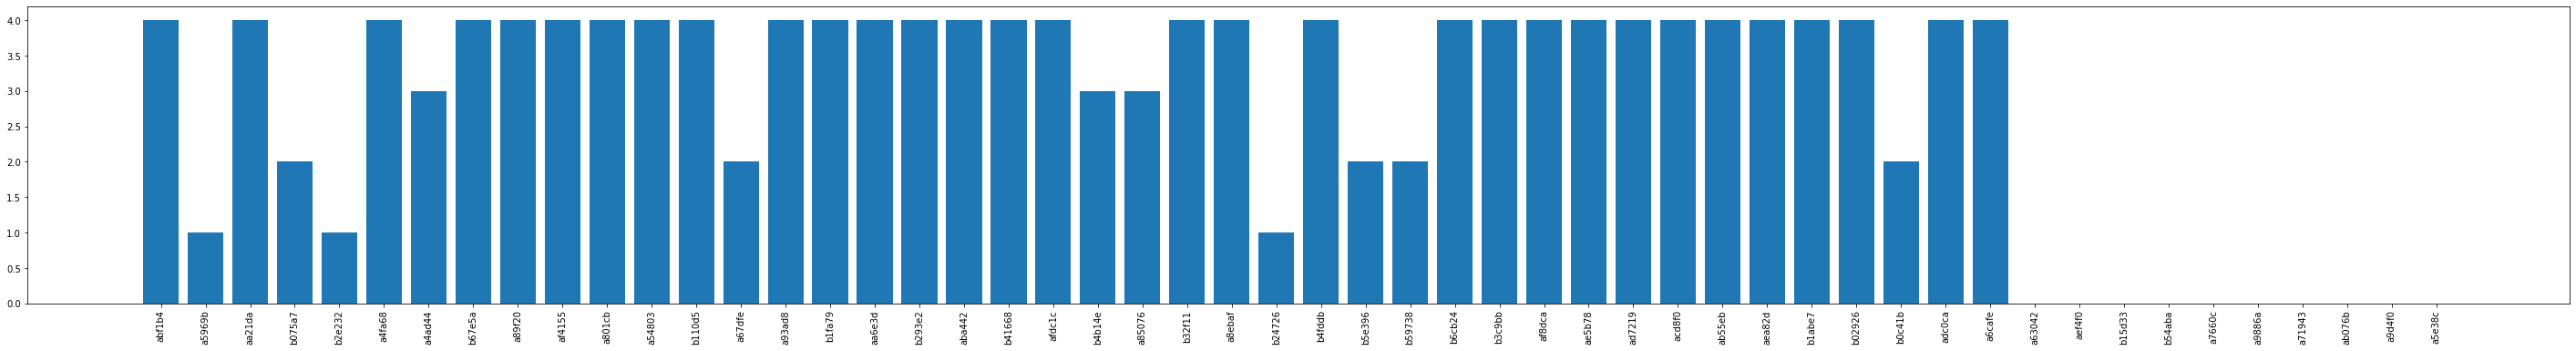

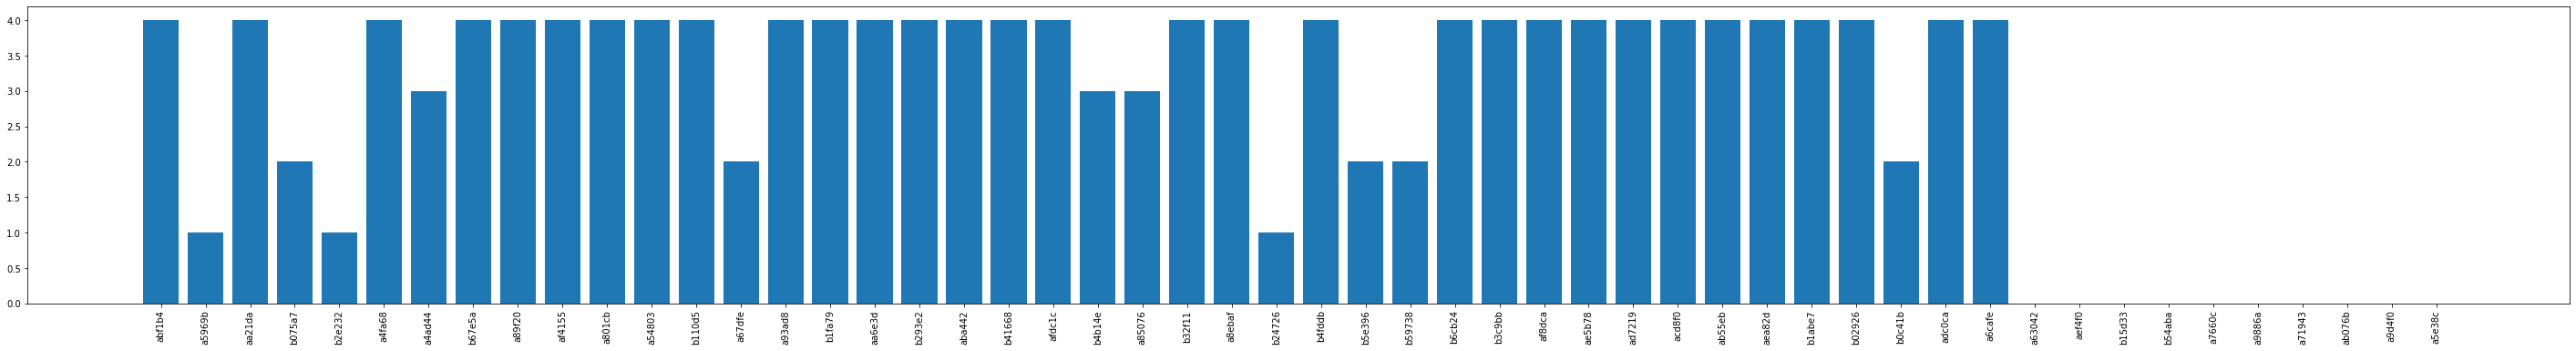

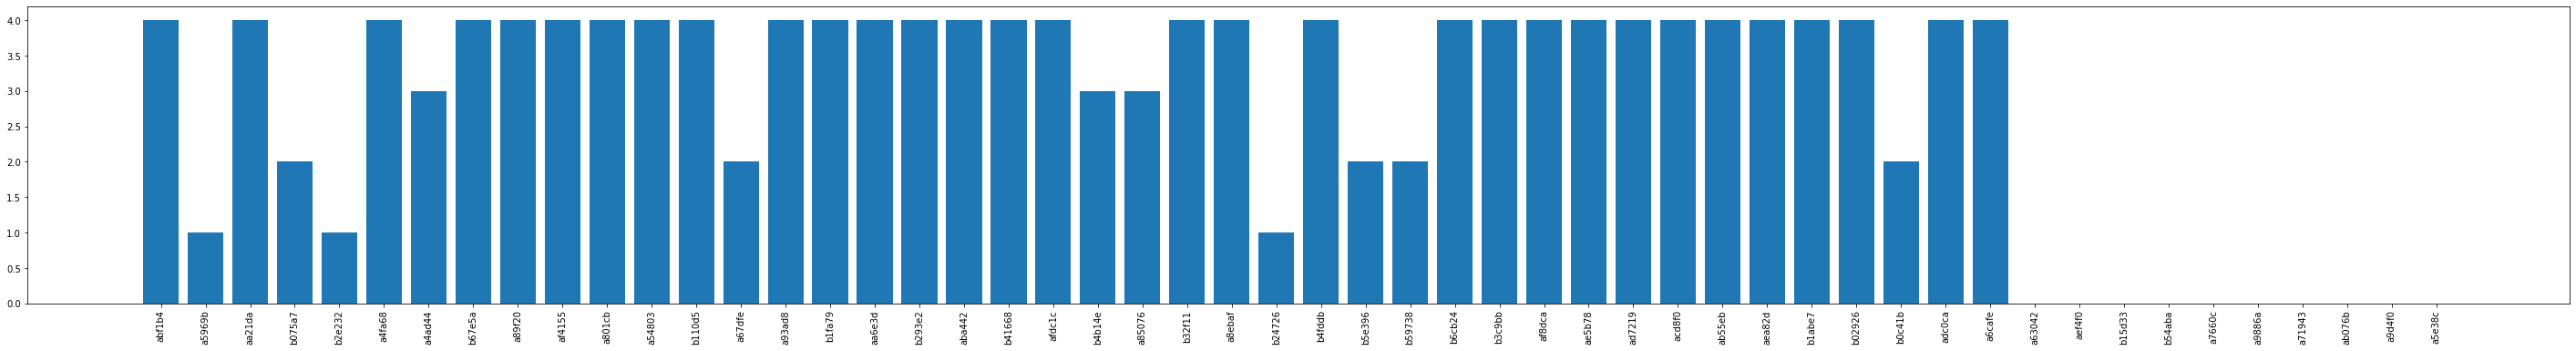

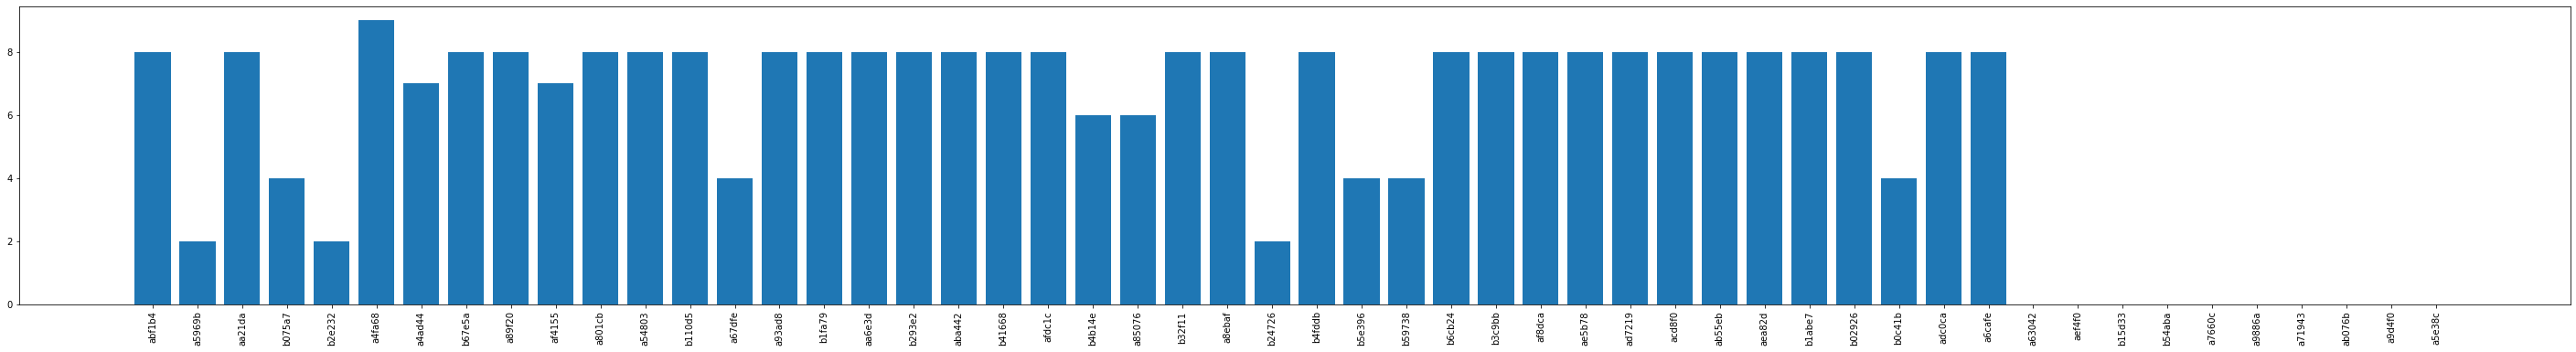

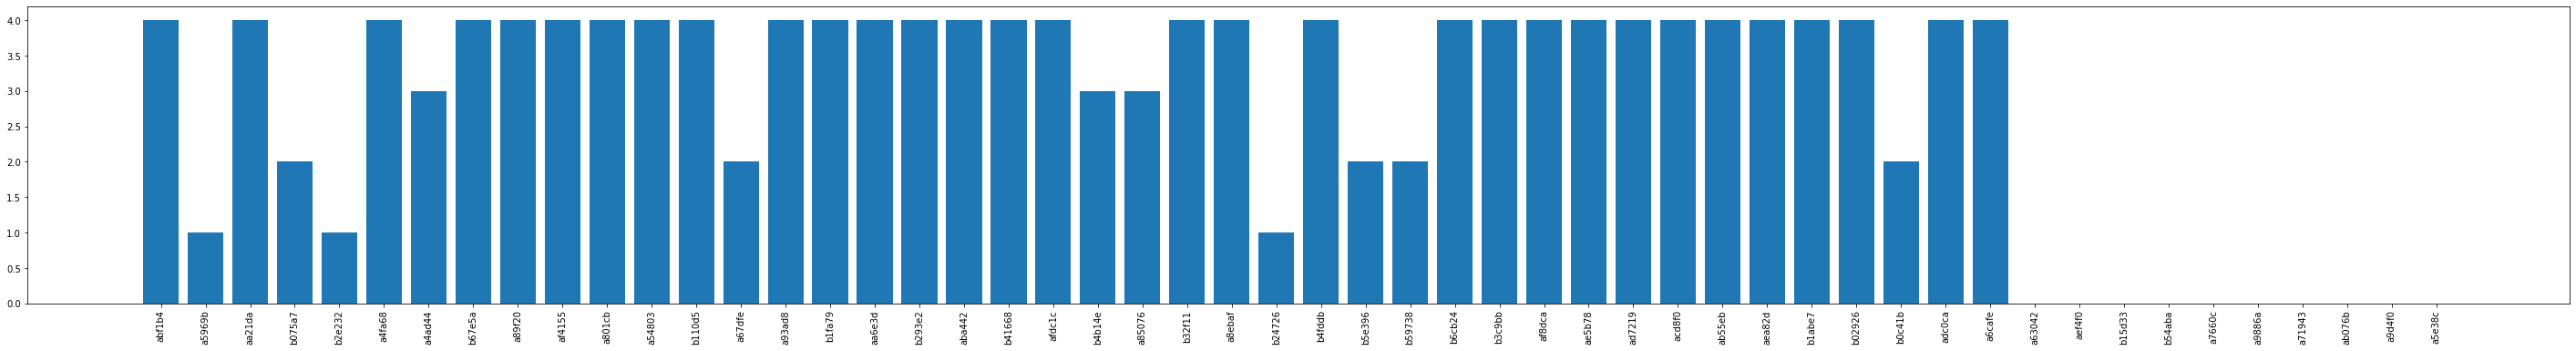

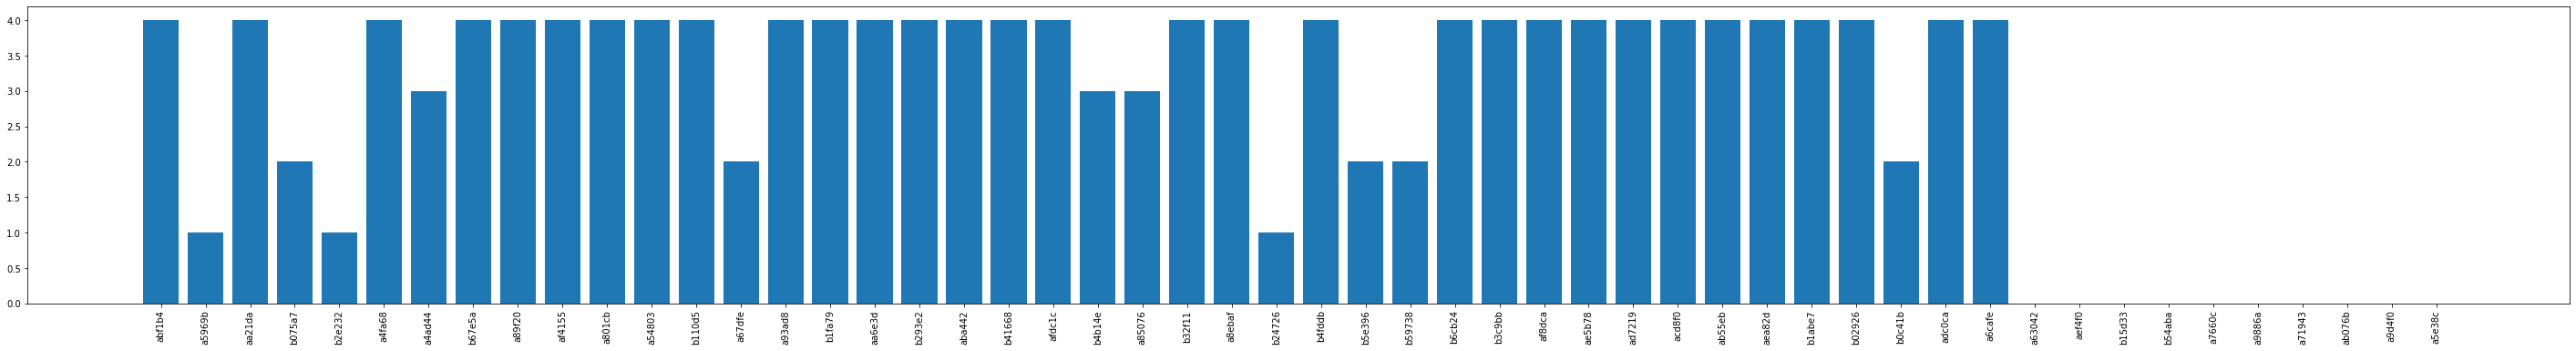

In [36]:
for layers in layerIdFrequencies:
  plt.figure()
  plt.xticks(rotation=90)
  plt.rcParams["figure.figsize"] = (50,6)
  plt.bar(layers.keys(), layers.values())

plt.show()

Seems like data for each patient is quite consistent across layers

In [ ]:
deadIDs = train_df.loc[train_df['Deces Code'] == 1]

# Dead people
for layers in layerIdFrequencies:
  plt.figure()
  plt.xticks(rotation=90)
  plt.rcParams["figure.figsize"] = (50,6)
  clrs = ['grey' if (x in list(deadIDs['id'])) else 'red' for x in layers.keys() ]

  plt.bar(layers.keys(), layers.values(), color=clrs)

plt.show()

# Gender
genderIDs = train_df.loc[train_df['sexe (0=F 1=M)'] == 1]

for layers in layerIdFrequencies:
  plt.figure()
  plt.xticks(rotation=90)
  plt.rcParams["figure.figsize"] = (50,6)
  clrs = ['blue' if (x in list(genderIDs['id'])) else 'red' for x in layers.keys() ]

  plt.bar(layers.keys(), layers.values(), color=clrs)

plt.show()

Looks same-y to me!

Ttest_indResult(statistic=-3.029612947430386, pvalue=0.0038693091500735365)


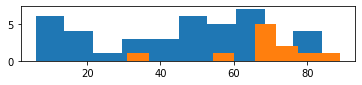

In [64]:
# In this experiment, is there a significant difference between men's OS and women's OS?
mensOS = train_df.loc[train_df['sexe (0=F 1=M)'] == 1]['OS']
womensOS = train_df.loc[train_df['sexe (0=F 1=M)'] == 0]['OS']

# Since different sizes.... we gotta use Welch Test (test with unequal variances)
print(stats.ttest_ind(mensOS, womensOS))
plt.figure()
plt.rcParams["figure.figsize"] = (12,3)
plt.hist(mensOS)
plt.hist(womensOS)
plt.show()

Appears as though men tend to die sooner than women



In [67]:
# GOAL: Check balance of image data against IDs 

paths = [IMAGEFILES + "/inflamed_cell_1", IMAGEFILES + "/inflamed_cell_2", IMAGEFILES + "/inflamed_cell_4", IMAGEFILES + "/inflamed_cell_5", IMAGEFILES + "/segmentation_tissue", IMAGEFILES + "/tumour_inflamed_cells_3", IMAGEFILES + "/tumour_inflamed_cells_6"]

for path in paths:
  print('Reading: ' , path)
  list_of_files = []
  idFrequency = {}

  for root, dirs, files in os.walk(path):
        for file in files:
            list_of_files.append(os.path.join(root,file))
    
  for name in list_of_files:
        img = Image.open(name)
        filename = os.path.basename(name)
        print(img.size)
        break



Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_1
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_2
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_4
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_5
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/segmentation_tissue
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_3
(1872, 1404)
Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_6
(1872, 1404)


# IMAGE ANALYSIS EDA
When reading through Review of Explainable Deep Learning Cancer Detection Models in Medical Imaging 
* Modern models tend to be Post Hoc Models where they are using transfer trained models and then adding models on top of that
* GRADCAM and it's variants are used in this type of architecture


In [69]:
# IMPORT ML MODEL RELATED THINGS
from keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image


Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_1


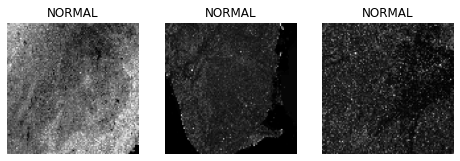

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_2


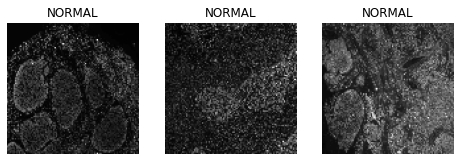

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_4


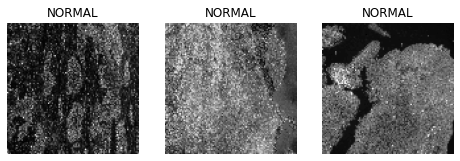

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/inflamed_cell_5


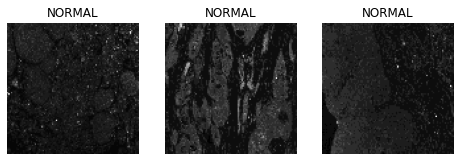

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/segmentation_tissue


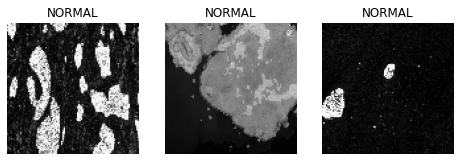

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_3


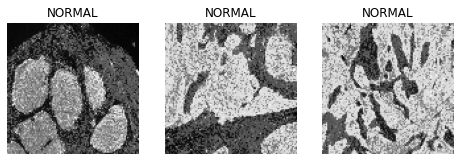

Reading:  /content/drive/MyDrive/Epidemium Season 3/ORLIAn /image_data_v2/tumour_inflamed_cells_6


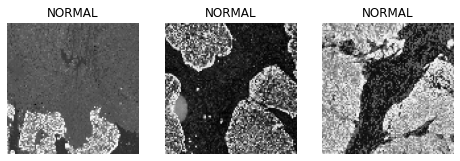

In [75]:
# Get the average image per layer

paths = [IMAGEFILES + "/inflamed_cell_1", IMAGEFILES + "/inflamed_cell_2", IMAGEFILES + "/inflamed_cell_4", IMAGEFILES + "/inflamed_cell_5", IMAGEFILES + "/segmentation_tissue", IMAGEFILES + "/tumour_inflamed_cells_3", IMAGEFILES + "/tumour_inflamed_cells_6"]
layerIdFrequencies = []

layerImages = []
for path in paths:
  print('Reading: ' , path)
  list_of_files = []

  for root, dirs, files in os.walk(path):
        for file in files:
            list_of_files.append(os.path.join(root,file))
  
  layerImages.append(list_of_files)
  randomSelection = np.random.choice(list_of_files, 3, replace = False)

  # plotting 2 x 3 image matrix
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      fp = f'{randomSelection[i]}'
      label = 'NORMAL'

      ax = fig.add_subplot(2, 3, i+1)
      
      # to plot without rescaling, remove target_size
      fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
      plt.imshow(fn, cmap='Greys_r')
      plt.title(label)
      plt.axis('off')
  plt.show()



  



In [78]:
layerImageMatrix = []
# making n X m matrix
def img2np(list_of_filename, size = (256, 256)):
    # iterating through each file
    for fn in list_of_filename:
        fp = fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
for listImages in layerImages:
  layerImageMatrix.append(img2np(listImages))

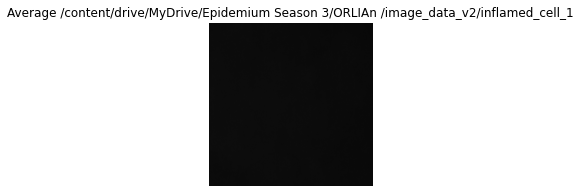

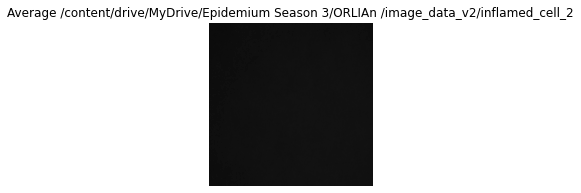

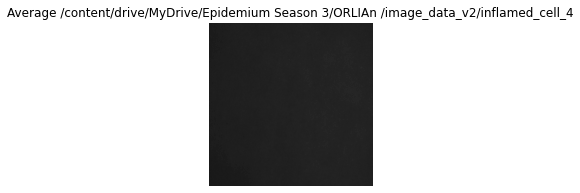

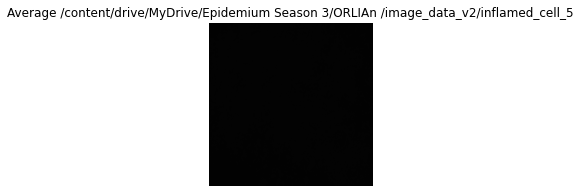

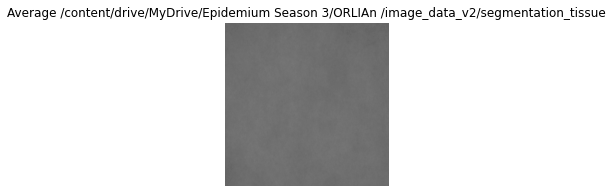

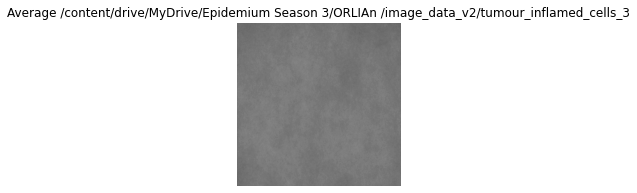

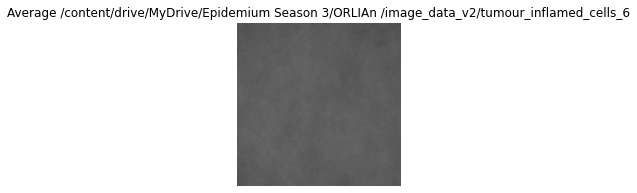

In [79]:
def find_mean_img(full_mat, title, size = (256, 256)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

count = 0 
for layerMatrix in layerImageMatrix:
  find_mean_img(layerMatrix, paths[count])
  count += 1